In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime, timezone
import nltk
from collections import Counter
global str

In [2]:
df = pd.read_csv("../Data files/ElectronicsProductsPricingData.csv")

In [3]:
df.head()

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,name,primaryCategories,sourceURLs,upc,weight,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,...,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.94E+11,32.8 pounds,NaN,NaN,NaN,NaN,NaN
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,In Stock,New,USD,2017-09-08T05:00:00Z,False,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,Yes,New,USD,2017-10-10T05:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,Yes,New,USD,2017-08-28T07:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(7249, 31)

In [5]:
df.describe()

,prices.amountMax,prices.amountMin,Unnamed: 28
count,7249.000000,7249.000000,6.000000e+00
mean,495.530610,463.963005,8.850000e+11
std,763.599387,680.504507,0.000000e+00
min,1.000000,1.000000,8.850000e+11
25%,79.990000,79.950000,8.850000e+11
50%,198.990000,189.990000,8.850000e+11
75%,494.990000,479.990000,8.850000e+11
max,6999.990000,5999.990000,8.850000e+11


## Data Cleaning

In [6]:
df.drop(['Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30'], axis=1,inplace=True)

In [7]:
df.head()

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,ean,imageURLs,keys,manufacturer,manufacturerNumber,name,primaryCategories,sourceURLs,upc,weight
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,...,NaN,https://images-na.ssl-images-amazon.com/images...,sanusvlf410b110inchsuperslimfullmotionmountfor...,NaN,VLF410B1,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.94E+11,32.8 pounds
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,...,NaN,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,In Stock,New,USD,2017-09-08T05:00:00Z,False,Walmart.com,Expedited,...,NaN,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,Yes,New,USD,2017-10-10T05:00:00Z,False,Bestbuy.com,NaN,...,NaN,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,Yes,New,USD,2017-08-28T07:00:00Z,False,Bestbuy.com,NaN,...,NaN,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds


In [8]:
df.shape

(7249, 26)

In [9]:
df = df.drop(['id', 'primaryCategories', 'sourceURLs', 'prices.sourceURLs', 'imageURLs', 'ean', 'asins', 'upc', 'keys',
             'manufacturer', 'manufacturerNumber'], axis=1)

In [10]:
df.shape

(7249, 15)

In [11]:
df = df.rename(columns={
    'prices.amountMax':'MaxPrice', 'prices.amountMin':'MinPrice', 'prices.availability':'Availability', 
                        'prices.condition':'isNew', 'prices.currency':'Currency', 'prices.dateSeen':'DateSeen', 
                        'prices.isSale':'isSale', 'prices.merchant':'Merchant', 'prices.shipping':'Shipping', 'brand':'Brand',
                        'categories':'Categories', 'dateAdded':'DateAdded', 'dateUpdated':'DateUpdated', 'name':'Name', 
                        'weight':'Weight'}
)

In [12]:
df.columns

Index(['MaxPrice', 'MinPrice', 'Availability', 'isNew', 'Currency', 'DateSeen',
       'isSale', 'Merchant', 'Shipping', 'Brand', 'Categories', 'DateAdded',
       'DateUpdated', 'Name', 'Weight'],
      dtype='object')

In [13]:
df['Availability'].unique()

array(['Yes', 'In Stock', 'TRUE', 'undefined', 'yes', 'Out Of Stock',
       'Special Order', 'No', 'More on the Way', 'sold', 'FALSE',
       'Retired', '32 available', '7 available'], dtype=object)

In [14]:
df['Availability'] = df['Availability'].map({
  'Yes':1, 'In Stock':1, 'TRUE':1, 'undefined':0, 'yes':1, 'Out Of Stock':0,
       'Special Order':1, 'No':0, 'More on the Way':0, 'sold':0, 'FALSE':0,
       'Retired':0, '32 available':1, '7 available':1 
})

In [15]:
df.head()

,MaxPrice,MinPrice,Availability,isNew,Currency,DateSeen,isSale,Merchant,Shipping,Brand,Categories,DateAdded,DateUpdated,Name,Weight
0,104.99,104.99,1,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",2015-04-13T12:00:51Z,2018-05-12T18:59:48Z,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,32.8 pounds
1,69.00,64.99,1,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2018-06-13T19:39:02Z,Boytone - 2500W 2.1-Ch. Home Theater System - ...,14 pounds
2,69.00,69.00,1,New,USD,2017-09-08T05:00:00Z,False,Walmart.com,Expedited,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2018-06-13T19:39:02Z,Boytone - 2500W 2.1-Ch. Home Theater System - ...,14 pounds
3,69.99,69.99,1,New,USD,2017-10-10T05:00:00Z,False,Bestbuy.com,NaN,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2018-06-13T19:39:02Z,Boytone - 2500W 2.1-Ch. Home Theater System - ...,14 pounds
4,66.99,66.99,1,New,USD,2017-08-28T07:00:00Z,False,Bestbuy.com,NaN,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2018-06-13T19:39:02Z,Boytone - 2500W 2.1-Ch. Home Theater System - ...,14 pounds


In [16]:
df['isNew'] = df['isNew'].map({'New':1, 'new':1, 'Seller refurbished':0, 'Used':0, 'pre-owned':0, 'Refurbished':0, 
                               'Manufacturer refurbished':0, 'New other (see details)':1, 'refurbished':0, 
                               'New Kicker BT2 41IK5BT2V2 Wireless Bluetooth USB Audio System Black + Remote, Power Supply (volts, ampere): 24, 2.9, Square Reflex Subwoofer (in., mm): 6 x 6", Stereo Amp Power with DSP (watts): 50, App for customizing - KickStart, Remote Control Included, Height x Width x Depth (in, mm): 8.87" x 19" x 9.14", Frequency Response (Hz): 24-20k, +-3dB, Woofer (in., cm): 5", 1 Year Manufacturer Warranty, Item Weight: 13.85 lbs., USB Port, Compatible with: Bluetooth-enabled devices, Aux-in, Speaker Design: 2-Way Full-Range, Bluetooth wireless streaming, Condition: Brand New!, Tweeter (in., cm): 3/4"':1,
                               '5/16" Ring Terminal, 3 ft. 8 GA Black Ground Cable, 6 ft. Split Loom Tubing, Depth: 6.5" (165mm) (top) 11.2" (285mm) (bottom), Item Weight: 18.5 lbs., Frequency Response 25Hz - 500Hz, Line Output, Max Power: 1100 Watt x 1 Channel @ 2 Ohm, 30 ft. Speaker Wire, Boss Illuminated Logo, Height: 12.8" (325mm), (3) Rubber Grommets, Item Weight: 2 lbs., Size 10", 20 ft. 8 GA Red Power Cable, Ported enclosure for greater output and deeper bass, 2 Ohm Stable, Class A/B, Voice Coil Size 2", Black rubber surround, Nominal Impedance 4 ohm, Rugged fiberboard construction with thick carpet covering, Warranty: 1 Year Manufacturer Warranty, MOSFET Power, Weight: 6 lbs, Width: 17.7" (450mm), Condition: Brand New!, Low Pass Crossover, List item, RMS Power: 250 Watt x 1 Channel @ 4 Ohm, Remote Bass Control Included!, 1/4" Ring Terminal, 16 ft. 18 GA Blue Turn-On Wire, Peak Power: 500 Watts, Competition High Quality Fuse Holder, Condition: BRAND NEW!, Product Condition: Brand New, RMS Power: 175 Watts, Aluminum woofer cone, THD: 0.01%, 1 Year Manufacturer Warranty, Dimensions: 10-7/16" (W) x 2-1/4" (H) x 9-1/8" (L), #10 Ring Terminal, 20 ft. High Performance Black RCA, SPL (db @ 1w/1m) 88dB, New Dual SBX101 10" 500 Watts Car Audio Subwoofer Sub + Ported Sub Enclosure, (20) 4" Wire Ties':1})

In [17]:
df['isSale']=df['isSale'].map({False:0,True:1})

In [18]:
df['isSale'].unique()

array([0, 1], dtype=int64)

In [19]:
df['Shipping'] = df['Shipping'].fillna(0)

In [20]:
df.head()

,MaxPrice,MinPrice,Availability,isNew,Currency,DateSeen,isSale,Merchant,Shipping,Brand,Categories,DateAdded,DateUpdated,Name,Weight
0,104.99,104.99,1,1,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",0,Bestbuy.com,0,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",2015-04-13T12:00:51Z,2018-05-12T18:59:48Z,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,32.8 pounds
1,69.00,64.99,1,1,USD,2017-12-14T06:00:00Z,1,Walmart.com,Expedited,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2018-06-13T19:39:02Z,Boytone - 2500W 2.1-Ch. Home Theater System - ...,14 pounds
2,69.00,69.00,1,1,USD,2017-09-08T05:00:00Z,0,Walmart.com,Expedited,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2018-06-13T19:39:02Z,Boytone - 2500W 2.1-Ch. Home Theater System - ...,14 pounds
3,69.99,69.99,1,1,USD,2017-10-10T05:00:00Z,0,Bestbuy.com,0,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2018-06-13T19:39:02Z,Boytone - 2500W 2.1-Ch. Home Theater System - ...,14 pounds
4,66.99,66.99,1,1,USD,2017-08-28T07:00:00Z,0,Bestbuy.com,0,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2018-06-13T19:39:02Z,Boytone - 2500W 2.1-Ch. Home Theater System - ...,14 pounds


In [21]:
df['Shipping'].unique()

array([0, 'Expedited', 'Value', 'Standard', 'Free Shipping',
       'Free Shippingon orders 35 and up', 'Free Expedited Shipping',
       'Free Shipping on orders 35 and up',
       'Free Expedited Shipping for most orders over $49', 'FREE',
       'Freight', 'Free Shipping for this Item', 'USD 7.95', 'USD 7.25',
       'USD 26.09', 'USD 10.00',
       'Free Standard Shipping on Orders Over $49', 'Free Delivery',
       'USD 11.30', 'USD 15.42', 'USD 35.03', 'USD 0.99',
       'Shipping Charges Apply', 'USD 60.00', 'USD 15.68', 'USD 5.99',
       'USD 196.92', 'USD 22.64', 'USD 20.00', 'USD 13.32', 'USD 12.78',
       'USD 13.25', 'USD 25.00', 'USD 6.65', 'USD 2.85', 'USD 7.81',
       'USD 10.10', 'USD 75.00', 'USD 13.95', 'Free Standard Shipping',
       'USD 20.55', 'USD 18.60', 'USD 11.75', 'USD 25.76', 'USD 27.94',
       'USD 14.00', 'USD 13.60', 'USD 5.00', 'USD 13.61', 'USD 3.99',
       'USD 7.50', 'USD 2.99', 'USD 12.21', 'USD 3.39', 'USD 22.13',
       'USD 6.00', 'USD 4.88'

In [22]:
df['Shipping'] = df['Shipping'].map({
     'Expedited':1, 'Value':1, 'Standard':1, 'Free Shipping':0,
       'Free Shippingon orders 35 and up':0, 'Free Expedited Shipping':0,
       'Free Shipping on orders 35 and up':0,
       'Free Expedited Shipping for most orders over $49':0, 'FREE':0,
       'Freight':1, 'Free Shipping for this Item':0,
       'Free Standard Shipping on Orders Over $49':0, 'Free Delivery':0,'Free Standard Shipping':0,'Free Next Day Delivery (USA)':0
}).fillna(1)

In [23]:
df['Shipping'].unique()

array([1., 0.])

In [24]:
df['Weight'].unique()

array(['32.8 pounds', '14 pounds', '1.2 pounds', '13.2 pounds',
       '1.6 lb 2.6 lb 1.6 lb 18.7 lb', '1.1 pounds', '1.18 lb',
       '0.14 ounces', '3.2 ounces', '6.7 ounces', '13.6 ounces',
       '0.017 pounds', '1.32 lb', '6.5 pounds', '5.2 pounds', '3 ounces',
       '5.6 ounces', '3.88 oz', '5 pounds', '150 pounds', '2.2 pounds',
       '11.79 pounds', '3.8 pounds', '3.0 lbs', '4 pounds', '4 ounces',
       '1.5 pounds', '5.0 oz', '2.9 lb', '27.8 pounds', '12.5 ounces',
       '26 pounds', '16.48 ounces', '0.8 ounces', '8 pounds', '5.2 lb',
       '18.7 lb', '32 pounds', '7.2 pounds', '34.8 lb', '4.2 pounds',
       '43.2 pounds', '1.52 lb', '0.6 ounces', '1.4 pounds',
       '22.1 pounds', '1.8 pounds', '2.4 ounces', '78.1 pounds',
       '50 pounds', '1.41 pounds', '7.2 ounces', '2 pounds', '2 ounces',
       '1.96 pounds', '3 pounds', '1.25 pounds', '9.3 pounds', '0.63 oz',
       '6.3 pounds', '3.1 lb', '3.3 lb', '8 lb', '8.05 pounds',
       '1.8 lbs                        

In [25]:
i = df[df['Weight']=='Electronics'].index

In [26]:
df = df.drop(i,axis=0)

In [27]:
i = df[df['Weight']=='http://www.walmart.com/ip/Kenwood-DDX9703S-6-95-Double-DIN-In-Dash-DVD-Receiver-with-Bluetooth-Apple-CarPlay-Android-Auto-HD-Radio-and-SiriusXM-Ready/54695274,https://www.amazon.com/Kenwood-DDX9703S-Stereo-Carplay-Android/dp/B01GITWG5S/,https://www.ebay.com/urw/product-reviews/6003304884?_itm=282520765993,https://www.ebay.com/urw/product-reviews/6003304884?_itm=272989525770,https://www.walmart.com/ip/Kenwood-DDX9703S-6-95-Double-DIN-In-Dash-DVD-Receiver-with-Bluetooth-Apple-CarPlay-Android-Auto-HD-Radio-and-SiriusXM-Ready/54695274,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded,https://www.bestbuy.com/site/kenwood-6-95-android-auto-apple-carplay-built-in-bluetooth-in-dash-cd-dvd-dm-receiver-black/4969400.p?skuId=4969400,http://www.ebay.com/itm/Kenwood-6-95-Android-Auto-Apple-CarPlay-Built-in-Bluetooth-In-Dash-/322229392622?hash=item4b065e54ee,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=28,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=27,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=24,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=26,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=20,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=25,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=22,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=21,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=23,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=16,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=19,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=18,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=17,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=15,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=13,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=14,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=12,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=11,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=7,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=5,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=8,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=10,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=2,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=9,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=6,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=3,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=4,http://www.ebay.com/itm/Kenwood-DDX9703S-2-DIN-DVD-CD-Player-6-95-LCD-Android-iPhone-HD-Radio-Bluetooth/182198714536,http://www.bestbuy.com/site/kenwood-6-95-android-auto-apple-carplay-built-in-bluetooth-in-dash-cd-dvd-dm-receiver-black/4969400.p?skuId=4969400,http://www.ebay.com/itm/Kenwood-DDX9703S-Double-2-DIN-DVD-CD-Player-Android-iPhone-HD-Radio-Bluetooth-/201635793843,http://www.ebay.com/itm/KENWOOD-DDX9703S-2-DIN-6-95-TV-DVD-CD-Player-Android-iPhone-HD-Radio-Bluetooth-/292166538126,http://www.ebay.com/itm/Kenwood-DDX9703S-CarPlay-Android-Stereo-2DIN-In-Dash-DVD-CD-AMFM-6-95-Touch-NEW-/132239386357,http://www.ebay.com/itm/Kenwood-DDX9703S-Double-2-DIN-DVD-CD-Player-Android-iPhone-HD-Radio-Bluetooth-/352086023468,http://www.ebay.com/itm/Kenwood-DDX9703S-Double-2-DIN-DVD-CD-Player-Android-iPhone-HD-Radio-Bluetooth-/201635793843?hash=item2ef26e0bb3:g:x7sAAOSwwo1Xfwa0&vxp=mtr,http://www.ebay.com/itm/Kenwood-DDX9703S-Double-2-DIN-DVD-CD-Player-Android-iPhone-HD-Radio-Bluetooth-/352086023468?hash=item51f9f65d2c:g:BJAAAOSw1~JZPvFJ,http://www.ebay.com/itm/Kenwood-DDX9703S-Double-2-DIN-DVD-CD-Player-Android-iPhone-HD-Radio-Bluetooth-/162546830375?hash=item25d88bcc27:g:~UIAAOSw8GtZOdR6,http://www.frys.com/product/8773411,http://frys.com/product/8773411,https://www.amazon.ca/Kenwood-DDX9703S-DVD-receiver/dp/B01GITWG5S,https://www.walmart.com/ip/Kenwood-DDX9703S-6.95-Double-DIN-In-Dash-DVD-Receiver-with-Bluetooth-Apple-CarPlay-Android-Auto-HD-Radio-and-SiriusXM-Ready/54695274'].index
df = df.drop(i,axis=0)

In [28]:
list(df['Weight'].unique())

['32.8 pounds',
 '14 pounds',
 '1.2 pounds',
 '13.2 pounds',
 '1.6 lb 2.6 lb 1.6 lb 18.7 lb',
 '1.1 pounds',
 '1.18 lb',
 '0.14 ounces',
 '3.2 ounces',
 '6.7 ounces',
 '13.6 ounces',
 '0.017 pounds',
 '1.32 lb',
 '6.5 pounds',
 '5.2 pounds',
 '3 ounces',
 '5.6 ounces',
 '3.88 oz',
 '5 pounds',
 '150 pounds',
 '2.2 pounds',
 '11.79 pounds',
 '3.8 pounds',
 '3.0 lbs',
 '4 pounds',
 '4 ounces',
 '1.5 pounds',
 '5.0 oz',
 '2.9 lb',
 '27.8 pounds',
 '12.5 ounces',
 '26 pounds',
 '16.48 ounces',
 '0.8 ounces',
 '8 pounds',
 '5.2 lb',
 '18.7 lb',
 '32 pounds',
 '7.2 pounds',
 '34.8 lb',
 '4.2 pounds',
 '43.2 pounds',
 '1.52 lb',
 '0.6 ounces',
 '1.4 pounds',
 '22.1 pounds',
 '1.8 pounds',
 '2.4 ounces',
 '78.1 pounds',
 '50 pounds',
 '1.41 pounds',
 '7.2 ounces',
 '2 pounds',
 '2 ounces',
 '1.96 pounds',
 '3 pounds',
 '1.25 pounds',
 '9.3 pounds',
 '0.63 oz',
 '6.3 pounds',
 '3.1 lb',
 '3.3 lb',
 '8 lb',
 '8.05 pounds',
 '1.8 lbs                                                                

In [29]:
def dateCleaner(date):
    date = str(date).split(',')[0]
    cleaned_date = datetime.fromisoformat(date[:-1]).astimezone(timezone.utc)
    return cleaned_date

In [30]:
df['DateSeen'] = df['DateSeen'].map(dateCleaner)
df['DateAdded'] = df['DateAdded'].map(dateCleaner)
df['DateUpdated'] = df['DateUpdated'].map(dateCleaner)

In [31]:
df.head()

,MaxPrice,MinPrice,Availability,isNew,Currency,DateSeen,isSale,Merchant,Shipping,Brand,Categories,DateAdded,DateUpdated,Name,Weight
0,104.99,104.99,1,1,USD,2017-03-30 00:30:00+00:00,0,Bestbuy.com,1.0,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",2015-04-13 06:30:51+00:00,2018-05-12 13:29:48+00:00,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,32.8 pounds
1,69.00,64.99,1,1,USD,2017-12-14 00:30:00+00:00,1,Walmart.com,1.0,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 08:44:56+00:00,2018-06-13 14:09:02+00:00,Boytone - 2500W 2.1-Ch. Home Theater System - ...,14 pounds
2,69.00,69.00,1,1,USD,2017-09-07 23:30:00+00:00,0,Walmart.com,1.0,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 08:44:56+00:00,2018-06-13 14:09:02+00:00,Boytone - 2500W 2.1-Ch. Home Theater System - ...,14 pounds
3,69.99,69.99,1,1,USD,2017-10-09 23:30:00+00:00,0,Bestbuy.com,1.0,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 08:44:56+00:00,2018-06-13 14:09:02+00:00,Boytone - 2500W 2.1-Ch. Home Theater System - ...,14 pounds
4,66.99,66.99,1,1,USD,2017-08-28 01:30:00+00:00,0,Bestbuy.com,1.0,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 08:44:56+00:00,2018-06-13 14:09:02+00:00,Boytone - 2500W 2.1-Ch. Home Theater System - ...,14 pounds


In [32]:
def poundsToNum(pounds):
    if type(pounds)==str:   
        pounds = pounds.split()
        num = float(pounds[0])
        unit = pounds[-1]
        if unit in ['oz', 'ounces']:
            num = num/16
        pounds = num
    return pounds

In [33]:
df['Weight'] = df['Weight'].map(poundsToNum)

In [34]:
df.head()

,MaxPrice,MinPrice,Availability,isNew,Currency,DateSeen,isSale,Merchant,Shipping,Brand,Categories,DateAdded,DateUpdated,Name,Weight
0,104.99,104.99,1,1,USD,2017-03-30 00:30:00+00:00,0,Bestbuy.com,1.0,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",2015-04-13 06:30:51+00:00,2018-05-12 13:29:48+00:00,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,32.8
1,69.00,64.99,1,1,USD,2017-12-14 00:30:00+00:00,1,Walmart.com,1.0,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 08:44:56+00:00,2018-06-13 14:09:02+00:00,Boytone - 2500W 2.1-Ch. Home Theater System - ...,14.0
2,69.00,69.00,1,1,USD,2017-09-07 23:30:00+00:00,0,Walmart.com,1.0,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 08:44:56+00:00,2018-06-13 14:09:02+00:00,Boytone - 2500W 2.1-Ch. Home Theater System - ...,14.0
3,69.99,69.99,1,1,USD,2017-10-09 23:30:00+00:00,0,Bestbuy.com,1.0,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 08:44:56+00:00,2018-06-13 14:09:02+00:00,Boytone - 2500W 2.1-Ch. Home Theater System - ...,14.0
4,66.99,66.99,1,1,USD,2017-08-28 01:30:00+00:00,0,Bestbuy.com,1.0,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 08:44:56+00:00,2018-06-13 14:09:02+00:00,Boytone - 2500W 2.1-Ch. Home Theater System - ...,14.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7216 entries, 0 to 7248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   MaxPrice      7216 non-null   float64            
 1   MinPrice      7216 non-null   float64            
 2   Availability  7216 non-null   int64              
 3   isNew         7216 non-null   int64              
 4   Currency      7216 non-null   object             
 5   DateSeen      7216 non-null   datetime64[ns, UTC]
 6   isSale        7216 non-null   int64              
 7   Merchant      7216 non-null   object             
 8   Shipping      7216 non-null   float64            
 9   Brand         7216 non-null   object             
 10  Categories    7216 non-null   object             
 11  DateAdded     7216 non-null   datetime64[ns, UTC]
 12  DateUpdated   7216 non-null   datetime64[ns, UTC]
 13  Name          7216 non-null   object             
 14  Weight  

## Exploratory Data Analysis

<AxesSubplot:>

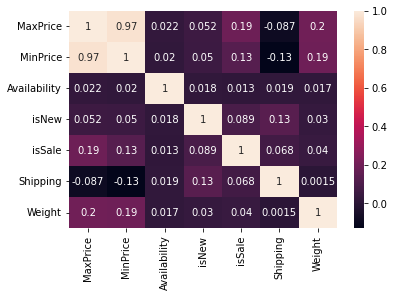

In [36]:
sub_df = df.drop(['Currency', 'DateSeen', 'Merchant', 'Brand', 'Categories', 'DateAdded', 'DateUpdated', 'Name'], axis=1)
corr = sub_df.corr()
sns.heatmap(data=corr,annot=True)


### Question 1. How does the prices.condition affect the pricing strategy of a product?

<AxesSubplot:xlabel='MaxPrice', ylabel='Density'>

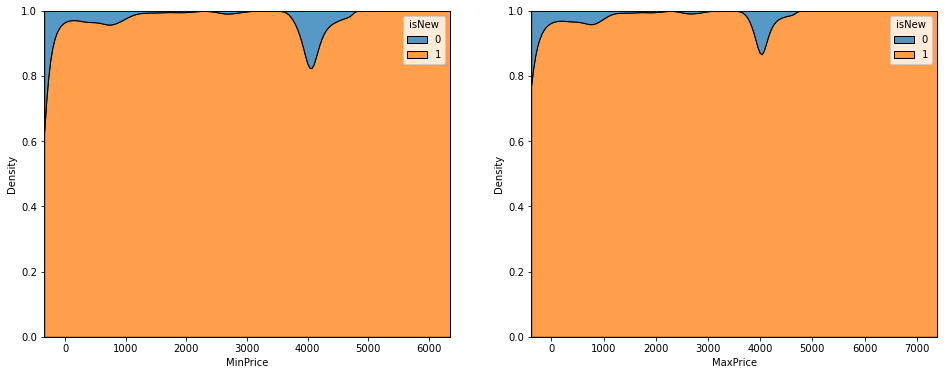

In [37]:
fig,ax = plt.subplots(1,2,figsize=(16,6))
data = df[['MaxPrice','MinPrice','isNew']]
sns.kdeplot(data=data,x='MinPrice',hue='isNew',multiple='fill',ax=ax[0])
sns.kdeplot(data=data,x='MaxPrice',hue='isNew',multiple='fill',ax=ax[1])

From the above graph we can see that round $4000 roughly 20% of products are old products (represented by the blue region) and the remaining 80% are new products.

Overall, it appears that the vast majority of the data in our dataset is of new products, making it likely that the conclusions we draw from this data are going to be biased. But that isn't to say we shouldn't draw any conclusions, just that we should be careful when considering and applying said conclusions.

Besides, there is already a rather interesting piece of information we can gain from these graphs. Understandably, old products generally appear at lower price ranges, however we also observe a sudden jump in old products at the $4000 area as well. Unfortunately for people looking to make large profits from used products, upon further digging into the data it seems this was just a result of a small number of products being in that price range to begin with and an outlier in terms of price for old products.

In [38]:
df[(df['MinPrice']>3900) & (df['MinPrice']<4100)] # 1428 is the outlier behind that sudden jump

,MaxPrice,MinPrice,Availability,isNew,Currency,DateSeen,isSale,Merchant,Shipping,Brand,Categories,DateAdded,DateUpdated,Name,Weight
1421,3959.99,3959.99,1,1,USD,2017-07-08 22:30:00+00:00,1,Bestbuy.com,1.0,Razer,"Computers/Tablets & Networking,Computers & Acc...",2017-05-22 02:06:58+00:00,2018-06-13 14:09:16+00:00,Razer - Blade Pro 17.3 4K Ultra HD Touch-Scree...,7.69
1428,3989.99,3989.99,1,0,USD,2017-08-28 08:30:00+00:00,1,compucell.tech,0.0,Razer,"Computers/Tablets & Networking,Computers & Acc...",2017-05-22 02:06:58+00:00,2018-06-13 14:09:16+00:00,Razer - Blade Pro 17.3 4K Ultra HD Touch-Scree...,7.69
2290,4999.99,4096.00,0,1,USD,2017-11-08 14:30:00+00:00,1,Beach Camera,1.0,Sony,"TVs & Electronics,4K Ultra HD TVs,TV, Video & ...",2017-04-04 04:07:00+00:00,2018-06-13 14:20:10+00:00,Sony - 55 Class - OLED - A1E Series - 2160p - ...,63.50
2297,3999.99,3999.99,1,1,USD,2017-05-31 13:30:00+00:00,0,Bestbuy.com,0.0,Sony,"TVs & Electronics,4K Ultra HD TVs,TV, Video & ...",2017-04-04 04:07:00+00:00,2018-06-13 14:20:10+00:00,Sony - 55 Class - OLED - A1E Series - 2160p - ...,63.50


As we can see the product is old but still it's price is 3989.99 USD

### Question 2.  Is there a correlation between the prices.dateSeen of a product and its dynamic pricing across merchants?

We will be doing this through first through a quick correlation coefficient calculation then into relatively simplistic line graph that looks at the flunctuations of product prices depending on the date, separated by merchants. 

In [39]:
def calcDiff(date):
    diff = date - base
    return diff.days

In [40]:
data = df.sort_values(by='DateSeen',ascending=False)
data=data[['DateSeen','Merchant','MinPrice']]
base = list(data.sort_values('DateSeen')['DateSeen'])[0]
data['DateSeen'] = data['DateSeen'].map(calcDiff)

In [41]:
data.head()

,DateSeen,Merchant,MinPrice
1648,1425,bhphotovideo.com,159.95
1984,1425,bhphotovideo.com,59.95
5104,1425,bhphotovideo.com,399.00
2604,1425,bhphotovideo.com,549.95
7106,1425,bhphotovideo.com,159.95


In [42]:
corr_df = data[['DateSeen', 'MinPrice']]
corr_df.corr()

,DateSeen,MinPrice
DateSeen,1.000000,0.027874
MinPrice,0.027874,1.000000


Merchant
Beach Camera        AxesSubplot(0.125,0.2;0.775x0.68)
Bestbuy.com         AxesSubplot(0.125,0.2;0.775x0.68)
Walmart.com         AxesSubplot(0.125,0.2;0.775x0.68)
bhphotovideo.com    AxesSubplot(0.125,0.2;0.775x0.68)
gear4less           AxesSubplot(0.125,0.2;0.775x0.68)
Name: MinPrice, dtype: object

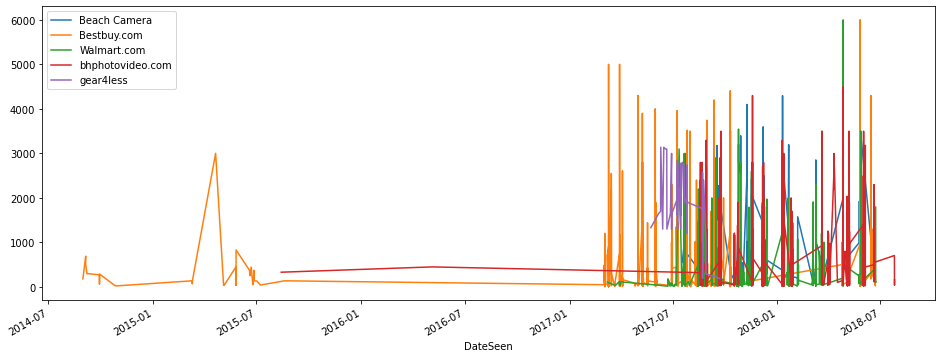

In [43]:
fig,ax = plt.subplots(figsize=(16,6))
data = df.sort_values(by='DateSeen', ascending=False)
data = data[['DateSeen', 'Merchant', 'MinPrice']].set_index('DateSeen')
top5 = data.groupby('Merchant').sum().sort_values('MinPrice', ascending=False).head(5)
data[data['Merchant'].isin(list(top5.index))].groupby('Merchant')['MinPrice'].plot(legend=True)

Merchant
Beach Camera        AxesSubplot(0.125,0.2;0.775x0.68)
Bestbuy.com         AxesSubplot(0.125,0.2;0.775x0.68)
Walmart.com         AxesSubplot(0.125,0.2;0.775x0.68)
bhphotovideo.com    AxesSubplot(0.125,0.2;0.775x0.68)
gear4less           AxesSubplot(0.125,0.2;0.775x0.68)
Name: MinPrice, dtype: object

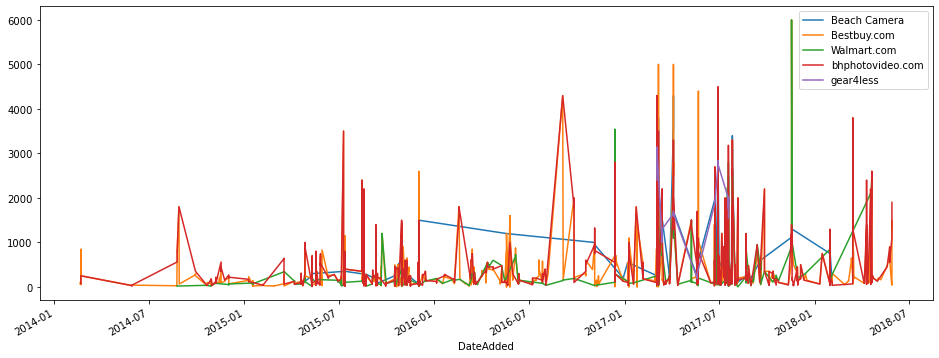

In [44]:
fig, ax = plt.subplots(figsize=(16,6))
data = df.sort_values(by='DateAdded', ascending=False)
data = data[['DateAdded', 'Merchant', 'MinPrice']].set_index('DateAdded')
top5 = data.groupby('Merchant').sum().sort_values('MinPrice', ascending=False).head(5)
data[data['Merchant'].isin(list(top5.index))].groupby('Merchant')['MinPrice'].plot(legend=True)

Merchant
Beach Camera        AxesSubplot(0.125,0.2;0.775x0.68)
Bestbuy.com         AxesSubplot(0.125,0.2;0.775x0.68)
Walmart.com         AxesSubplot(0.125,0.2;0.775x0.68)
bhphotovideo.com    AxesSubplot(0.125,0.2;0.775x0.68)
gear4less           AxesSubplot(0.125,0.2;0.775x0.68)
Name: MinPrice, dtype: object

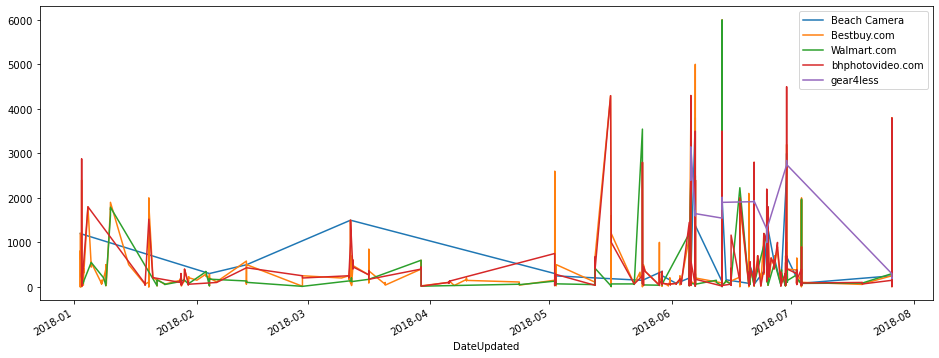

In [45]:
fig, ax = plt.subplots(figsize=(16,6))
data = df.sort_values(by='DateUpdated', ascending=False)
data = data[['DateUpdated', 'Merchant', 'MinPrice']].set_index('DateUpdated')
top5 = data.groupby('Merchant').sum().sort_values('MinPrice', ascending=False).head(5)
data[data['Merchant'].isin(list(top5.index))].groupby('Merchant')['MinPrice'].plot(legend=True)

As can be seen from the above graphs, it appears that prices flunctuate pretty randomly regardless of which date we use. From all this, I think the best conclusion we can draw is that dates alone don't really have anything to do with pricing strategy, however if important market events/movements happened on a specific date then it is likely that product prices will change. Though without data on such market events, we are hard pressed to find much more in this vein through this dataset alone.

### 3. What is the competitive pricing strategy for the same product from different merchants?

In [46]:
data = df[['Name','Merchant','MinPrice']]

In [47]:
data

,Name,Merchant,MinPrice
0,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Bestbuy.com,104.99
1,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Walmart.com,64.99
2,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Walmart.com,69.00
3,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Bestbuy.com,69.99
4,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Bestbuy.com,66.99
...,...,...,...
7244,Lowepro - Slingshot Edge 250 AW Camera Backpac...,Bestbuy.com,79.99
7245,Lowepro - Slingshot Edge 250 AW Camera Backpac...,bhphotovideo.com,68.75
7246,Lowepro - Slingshot Edge 250 AW Camera Backpac...,Bestbuy.com,70.99
7247,Lowepro - Slingshot Edge 250 AW Camera Backpac...,Bestbuy.com,71.99


In [48]:
top5 = data.groupby(['Name']).mean().sort_values(by='MinPrice',ascending=False).head(5).index

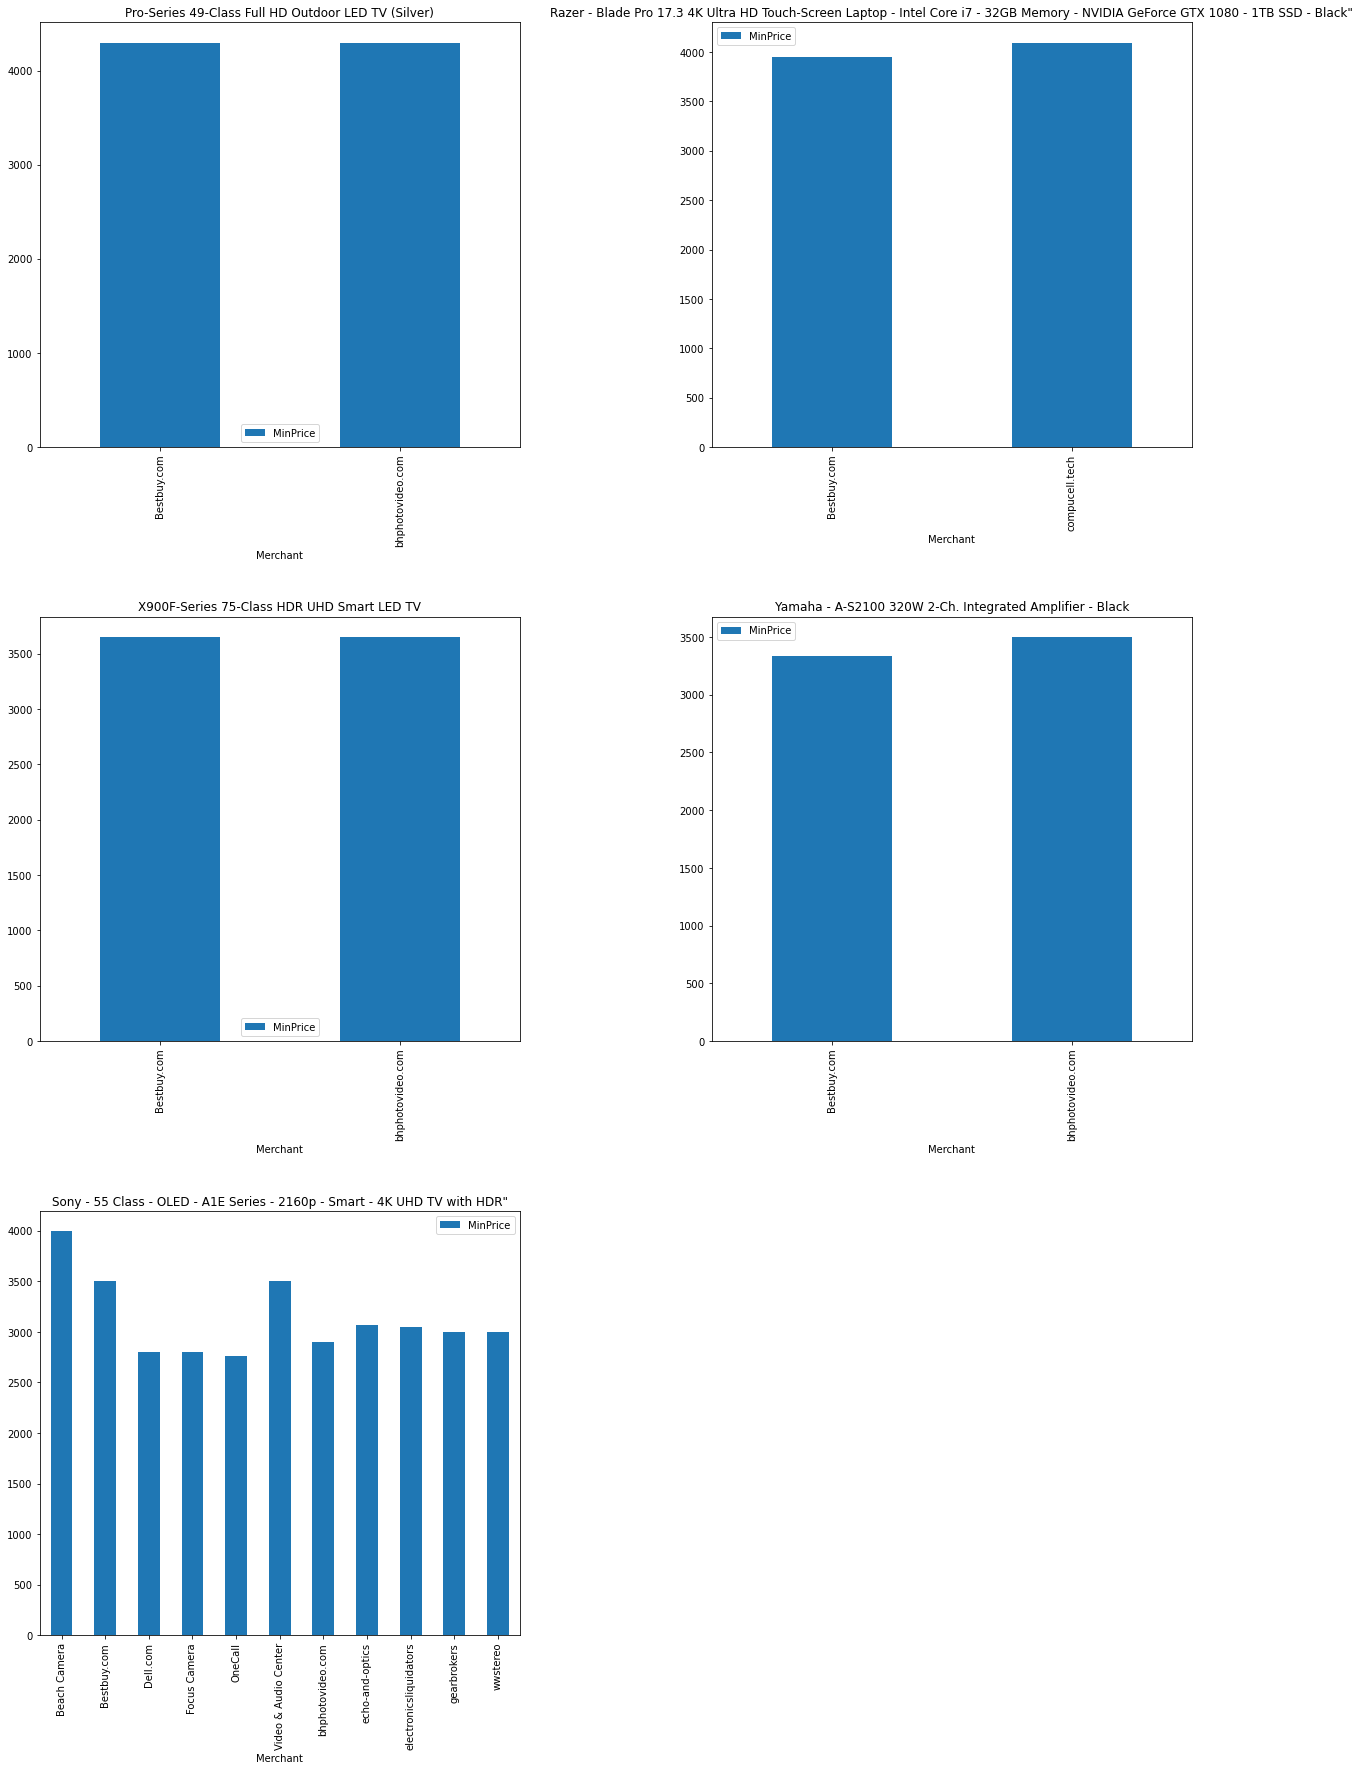

In [49]:
fig, ax = plt.subplots(3,2, figsize=(20,28))
plot_df1 = data[data["Name"]==top5[0]].groupby("Merchant").mean()
plot_df2 = data[data["Name"]==top5[1]].groupby("Merchant").mean()
plot_df3 = data[data["Name"]==top5[2]].groupby("Merchant").mean()
plot_df4 = data[data["Name"]==top5[3]].groupby("Merchant").mean()
plot_df5 = data[data["Name"]==top5[4]].groupby("Merchant").mean()
plot_df1.plot.bar(y='MinPrice', use_index=True, title=top5[0], ax=ax[0,0])

plot_df2.plot.bar(y='MinPrice', use_index=True, title=top5[1], ax=ax[0,1])
plot_df3.plot.bar(y='MinPrice', use_index=True, title=top5[2], ax=ax[1,0])
plot_df4.plot.bar(y='MinPrice', use_index=True, title=top5[3], ax=ax[1,1])
plot_df5.plot.bar(y='MinPrice', use_index=True, title=top5[4], ax=ax[2,0])

fig.delaxes(ax[2,1])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

### 4.What role does a product’s category play in its listing price?

In [50]:
df.columns

Index(['MaxPrice', 'MinPrice', 'Availability', 'isNew', 'Currency', 'DateSeen',
       'isSale', 'Merchant', 'Shipping', 'Brand', 'Categories', 'DateAdded',
       'DateUpdated', 'Name', 'Weight'],
      dtype='object')

In [52]:
data =df[['Categories','MinPrice']]
data.groupby('Categories').mean().sort_values('MinPrice',ascending=False)

,MinPrice
Categories,
"LED & LCD TVs,TVs,Outdoor TVs,All Flat-Screen TVs,Electronics,Television & Video,Televisions,TVs Entertainment,TV & Home Theater,All Flat-Panel TVs",4295.784000
"Computers/Tablets & Networking,Computers & Accessories,PC Laptops & Netbooks,Laptops & Netbooks,Traditional Laptops,Computers & Tablets,Electronics,Laptops,All Laptops,PC Laptops",3975.990000
"LED & LCD TVs,TVs,Electronics,Television & Video,Televisions,TVs Entertainment,TV & Home Theater,All Flat-Panel TVs",3648.995000
"Integrated Amplifiers,Power Amplifiers,Receivers Amplifiers,Electronics,Receivers & Amplifiers,Home Audio,TVs Entertainment,Musical Instruments,Amplifiers,Audio",3374.972500
"TVs & Electronics,4K Ultra HD TVs,TV, Video & Home Audio,Electronics,4K Sony TVs,TVs Entertainment,Televisions,TV & Home Theater,All Flat-Panel TVs,OLED TVs,All TVs,Consumer Electronics,TVs,TV & Video,Smart TVs by Brand,4K TVs by Brand,Television & Video,Sony Smart TVs,4K Ultra HDTVs",3204.793462
...,...
"Computers,Wall Chargers & Power Adapters,Other Camcorder Accessories,Wall Chargers,Cell/Smart Phones Accessories,Electronics,Cell Phone Accessories,Cell/Smart Phone Accessories,Accessories,Wall Chargers uaedvcevatubu,Mobile Power,Cell/Smart Phone Chargers,Multipurpose Batteries & Power,Wall Chargers fcxxdxcqvyfwsq,Camcorder Accessories,Electrical,Cables & Adapters,Chargers & Cradles,Chargers,Frys,Cell Phones,Home Electronics,Adapters, Cables & Chargers,Headphones,Consumer Electronics,Power Cables & Connectors,Power Accessories,Cell Phones & Accessories,Mobile Power zxqyvbwuwyydcq",15.451200
"Tools,Automotive,Batteries, Chargers & Jumper Cables,Car Battery Chargers,Home & Garden,Household Supplies & Cleaning,Other Home Cleaning Supplies,electronics,Cell Phones,Cell Phone Accessories,Cell Phone Batteries & Power,Portable Chargers/Power Packs",14.923333
"Smart Home,Smart Electronics,Bluetooth Speakers,Electronics,Home Audio & Theater,Home Audio,All Home Speakers,Speaker Systems,Audio,Bluetooth & Wireless Speakers,Stereos",13.953333


In [82]:
def summarizer(categories):
    categories = categories.replace(',', ' ')
    tokens = nltk.word_tokenize(categories)
    tagged = nltk.pos_tag(tokens)
    
    count_list = []
    for i in range(len(tagged)):
        if tagged[i][1] == 'NNP':
            count_list.append(tagged[i])
            
    counts = Counter(word for word,tag in count_list)
    return max(counts, key=counts.get)

In [83]:
data['Categories'] = data['Categories'].map(summarizer)

C:\Users\ramas\AppData\Local\Temp\ipykernel_11608\3575954844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Categories'] = data['Categories'].map(summarizer)


In [86]:
data['Categories']

0       Accessories
1              Home
2              Home
3              Home
4              Home
           ...     
7244         Camera
7245         Camera
7246         Camera
7247         Camera
7248         Camera
Name: Categories, Length: 7216, dtype: object

In [84]:
plot_data = data.groupby('Categories').sum().sort_values('MinPrice', ascending=False).head(10)

<AxesSubplot:xlabel='Categories'>

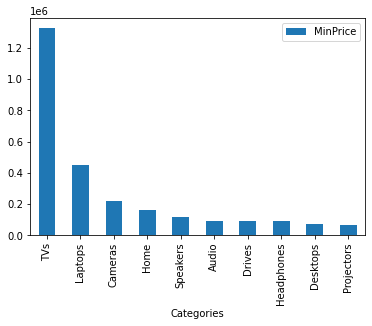

In [85]:
plot_data.plot.bar(y='MinPrice', use_index=True)

As we can see from the results above, it appears that TVs, laptops and cameras are the most popular and expensive categories. As TVs are most likely the most expensive product from the range of products in the dataset, this result is not too surprising.